In [4194]:
import pandas as pd
import numpy as np
import cufflinks as cf
import seaborn as sns
%matplotlib inline
from plotly import __version__
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
cf.go_offline()
print(__version__) # requires version >= 1.9.0

5.15.0


# Comprensión de los Datos

In [4195]:
df = pd.read_csv("../data/bike_buyers.csv")

In [4196]:
df.head(10)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
7,19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes


In [4197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [4198]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [4199]:
variables_con_na = df.columns[df.isna().any()].tolist()
variables_con_na

['Marital Status', 'Gender', 'Income', 'Children', 'Home Owner', 'Cars', 'Age']

In [4200]:
na_values = df[df['Marital Status'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
27,18283,NaN,Female,100000.0,0.0,Bachelors,Professional,No,1.0,5-10 Miles,Pacific,40.0,No
49,14939,NaN,Male,40000.0,0.0,Bachelors,Clerical,Yes,0.0,0-1 Miles,Europe,39.0,Yes
98,19441,NaN,Male,40000.0,0.0,Graduate Degree,Clerical,Yes,0.0,0-1 Miles,Europe,NaN,Yes
150,26154,NaN,Male,60000.0,1.0,Partial College,Skilled Manual,Yes,1.0,5-10 Miles,Pacific,43.0,Yes
234,24611,NaN,Male,90000.0,0.0,Bachelors,Professional,No,4.0,10+ Miles,Pacific,35.0,Yes
301,17926,NaN,Female,NaN,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Pacific,28.0,Yes


In [4201]:
#Dependiendo del numero de hijos se define si estas casado o no
fig = px.box(df, y = 'Children', x = "Marital Status", color = "Gender")
fig.show()

In [4202]:
na_values_gender = df[df['Gender'].isna()]
na_values_gender

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
154,23426,Single,NaN,80000.0,5.0,Graduate Degree,Management,Yes,3.0,0-1 Miles,Pacific,40.0,No
335,24369,Married,NaN,80000.0,5.0,Graduate Degree,Management,No,2.0,0-1 Miles,Pacific,39.0,No
601,29231,Single,NaN,80000.0,4.0,Partial College,Professional,No,2.0,0-1 Miles,North America,43.0,No
688,11699,Single,NaN,60000.0,NaN,Bachelors,Skilled Manual,No,2.0,0-1 Miles,North America,NaN,No
695,18390,Married,NaN,80000.0,5.0,Partial College,Professional,Yes,2.0,0-1 Miles,North America,44.0,No
867,26693,Married,NaN,70000.0,3.0,Partial College,Professional,Yes,1.0,5-10 Miles,North America,49.0,No
908,23195,Single,NaN,50000.0,3.0,Bachelors,Skilled Manual,Yes,2.0,2-5 Miles,North America,41.0,Yes
951,22296,Married,NaN,70000.0,0.0,Bachelors,Professional,No,1.0,0-1 Miles,North America,38.0,No
973,11734,Married,NaN,60000.0,1.0,Partial College,Skilled Manual,No,1.0,0-1 Miles,North America,47.0,No


In [4203]:
#Eliminamos los na's de la columna genero ya que no se puede inferir su valor con grafico de cajas 

#Puede ser aleatorio tambien
df = df.dropna(subset=['Gender'], axis=0)
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,Married,Male,80000.0,5.0,Partial College,Professional,Yes,3.0,1-2 Miles,North America,46.0,No
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [4204]:
na_values_income = df[df['Income'].isna()]
na_values_income

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes
110,21006,Single,Female,NaN,1.0,Partial College,Manual,No,0.0,0-1 Miles,Europe,46.0,Yes
191,26944,Single,Male,NaN,2.0,High School,Manual,Yes,0.0,0-1 Miles,Europe,36.0,Yes
301,17926,NaN,Female,NaN,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Pacific,28.0,Yes
441,11061,Married,Male,NaN,2.0,Partial College,Skilled Manual,Yes,2.0,5-10 Miles,Pacific,52.0,Yes
509,24357,Married,Male,NaN,3.0,Bachelors,Professional,Yes,1.0,2-5 Miles,North America,48.0,Yes


In [4205]:
#Dependiendo de la educación y la ocupación se infiere la ganancia de los na's de la columna income
fig = px.box(df, y = 'Income', x = "Occupation", color = "Education")
fig.show()

In [4206]:
#Se verifican que datos contienen los na's de la columna children
na_values_children = df[df['Children'].isna()]
na_values_children

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
117,24065,Single,Female,20000.0,NaN,High School,Manual,Yes,0.0,0-1 Miles,Europe,40.0,Yes
217,13673,Single,Female,20000.0,NaN,Partial High School,Manual,No,2.0,0-1 Miles,Europe,25.0,No
386,28957,Single,Female,120000.0,NaN,Partial High School,Professional,Yes,4.0,10+ Miles,Pacific,34.0,Yes
549,13453,Married,Female,130000.0,NaN,Bachelors,Management,Yes,3.0,0-1 Miles,North America,45.0,Yes
638,18949,Single,Male,70000.0,NaN,Graduate Degree,Management,Yes,2.0,5-10 Miles,North America,74.0,Yes
805,26778,Single,Female,40000.0,NaN,High School,Skilled Manual,Yes,2.0,5-10 Miles,North America,31.0,No
960,23491,Single,Male,100000.0,NaN,Partial College,Professional,No,4.0,1-2 Miles,North America,45.0,No


In [4207]:
# Haciendo uso del gráfico de Marital Status, definimos la cantidad de hijos

In [4208]:
na_values_homeOwner = df[df['Home Owner'].isna()]
na_values_homeOwner

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
365,22636,Single,Female,40000.0,0.0,Bachelors,Clerical,NaN,0.0,0-1 Miles,Europe,38.0,Yes
646,16247,Single,Female,60000.0,4.0,Graduate Degree,Skilled Manual,NaN,0.0,1-2 Miles,North America,47.0,No
943,24322,Married,Female,60000.0,4.0,Bachelors,Skilled Manual,NaN,2.0,0-1 Miles,North America,42.0,No


In [4209]:
#Dependiendo de la cantidad de hijos y el estado civil se infiere si tiene casa o no
fig = px.box(df, y = 'Children', x = "Home Owner", color = "Marital Status")
fig.show()

In [4210]:
na_values_cars = df[df['Cars'].isna()]
na_values_cars

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
12,11434,Married,Male,170000.0,5.0,Partial College,Professional,Yes,NaN,0-1 Miles,Europe,55.0,No
196,16209,Single,Female,50000.0,0.0,Graduate Degree,Skilled Manual,Yes,NaN,1-2 Miles,Europe,36.0,No
202,18626,Single,Male,40000.0,2.0,Partial College,Clerical,Yes,NaN,1-2 Miles,Europe,33.0,Yes
351,13572,Single,Male,10000.0,3.0,High School,Manual,Yes,NaN,0-1 Miles,Europe,37.0,Yes
448,11383,Married,Female,30000.0,3.0,Graduate Degree,Clerical,Yes,NaN,0-1 Miles,Europe,46.0,No
511,12207,Single,Male,80000.0,4.0,Bachelors,Management,Yes,NaN,5-10 Miles,North America,66.0,Yes
561,27218,Married,Female,20000.0,2.0,Partial High School,Clerical,No,NaN,0-1 Miles,North America,48.0,No
615,11538,Single,Female,60000.0,4.0,Graduate Degree,Skilled Manual,No,NaN,0-1 Miles,North America,47.0,Yes
933,11941,Single,Male,60000.0,0.0,Partial College,Skilled Manual,Yes,NaN,5-10 Miles,North America,29.0,No


In [4211]:
#Dependiendo de la cantidad de la ganancia de la personas y si tiene casa o no se infiere cuantos carros tiene
fig = px.box(df, y = 'Income', x = "Cars", color = "Home Owner")
fig.show()

In [4212]:
na_values_age = df[df['Age'].isna()]
na_values_age

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes
98,19441,NaN,Male,40000.0,0.0,Graduate Degree,Clerical,Yes,0.0,0-1 Miles,Europe,NaN,Yes
225,14135,Married,Male,20000.0,1.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,NaN,No
371,22918,Single,Male,80000.0,5.0,Graduate Degree,Management,Yes,3.0,0-1 Miles,Pacific,NaN,No
554,18580,Married,Female,60000.0,2.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,NaN,Yes
770,17699,Married,Male,60000.0,1.0,Graduate Degree,Skilled Manual,No,0.0,0-1 Miles,North America,NaN,No
986,23704,Single,Male,40000.0,5.0,High School,Professional,Yes,4.0,10+ Miles,North America,NaN,Yes


In [4213]:
# Se infiere la edad en función de Marital Status y la cantidad de hijos
fig = px.box(df, y = 'Age', x = "Marital Status", color = "Children")
fig.show()

# Preparación de los Datos

In [4214]:
#Para reemplazar los valores NA de Marital Status, primero obtenemos el porcentaje de Marital Status por Gender
distribucion_marital_status = df.groupby('Gender')['Marital Status'].value_counts(normalize=True)

print(distribucion_marital_status)

Gender  Marital Status
Female  Single            0.509240
        Married           0.490760
Male    Married           0.585859
        Single            0.414141
Name: Marital Status, dtype: float64


In [4215]:
#Reemplazo de valores NA en Marital Status Según Género y cantidad de hijos
def fill_marital_status(row):
    if pd.isnull(row['Marital Status']):
        if row['Children'] <= 1:
            return 'Single'
        elif row['Children'] <= 3:
            return 'Married'
        elif row['Children'] <= 4 and row['Gender'] == 'Male':
            return 'Married'
        else:
            return 'Single'
    else:
        return row['Marital Status']
df['Marital Status'] = df.apply(fill_marital_status, axis=1)

In [4216]:
#Verificamos el reemplazo de todos los NA en Marital Status
na_values = df[df['Marital Status'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [4217]:
#Verificamos que no hemos modificado valores diferentes a NA
distribucion_marital_status = df.groupby('Gender')['Marital Status'].value_counts(normalize=True)

print(distribucion_marital_status)

Gender  Marital Status
Female  Single            0.511247
        Married           0.488753
Male    Married           0.582000
        Single            0.418000
Name: Marital Status, dtype: float64


In [4218]:
df["Income"].describe()

count       983.000000
mean      56124.109868
std       31193.712788
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

In [4219]:
# Calcular la media de 'Income' por 'Occupation' y 'Education'
media_income = df.groupby(['Occupation', 'Education'])['Income'].transform('mean')
df['Income'].fillna(media_income, inplace=True)

In [4220]:
#Verificamos el reemplazo de todos los NA en Income
na_values = df[df['Income'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [4221]:
#Verificamos que no se hallan modificado valores ajenos a los NA en Income
df["Income"].describe()

count       989.000000
mean      55987.508017
std       31194.558980
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

In [4222]:
#Información detallada de Children
df["Children"].describe()

count    982.000000
mean       1.901222
std        1.621535
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Children, dtype: float64

In [4223]:
# Calcular la media de 'Children' por 'Gender' y 'Marital Status'
media_children = df.groupby(['Gender', 'Marital Status'])['Children'].transform('mean')
df['Children'].fillna(media_children, inplace=True)

In [4224]:
#Verificamos el correcto reemplazo
na_values = df[df['Children'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [4225]:
#Verificamos que no se hayan modificado valores ajenos a NA
df["Children"].describe()

count    989.000000
mean       1.900143
std        1.615904
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Children, dtype: float64

In [4226]:
#Visualizamos mejor la data de Home Owner
df["Home Owner"].describe()

count     985
unique      2
top       Yes
freq      676
Name: Home Owner, dtype: object

In [4227]:
#calculamos la media de Home Owner en función de Children y Marital Status
media_home_owner = df.groupby(['Children', 'Marital Status'])['Home Owner'].transform(lambda x: x.mode().iloc[0])

In [4228]:
#reemplazamos los NA
df['Home Owner'].fillna(media_home_owner, inplace=True)

In [4229]:
#Verificamos el reemplazo
na_values = df[df['Home Owner'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [4230]:
#Verificamos la data de 'Home Owner'
df["Home Owner"].describe()

count     989
unique      2
top       Yes
freq      679
Name: Home Owner, dtype: object

In [4231]:
#Obtenemos datos detallados de Cars
df["Cars"].describe()

count    980.000000
mean       1.454082
std        1.124949
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Cars, dtype: float64

In [4232]:
#Definimos la cantidad de Cars en función de Income y de Home Owner
media_cars = df.groupby(['Income', 'Home Owner'])['Cars'].transform('mean')
df['Cars'].fillna(media_cars, inplace=True)

In [4233]:
#Verificamos el correcto reemplazo
na_values = df[df['Cars'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
12,11434,Married,Male,170000.0,5.0,Partial College,Professional,Yes,NaN,0-1 Miles,Europe,55.0,No


In [4234]:
#Visualizamos que no se reemplazó un NA debido a la falta de datos de personas con Income tan alto
#Ante esta situación, buscamos cuáles son las personas con mayores ingresos
personas_ingreso_alto = df.nlargest(5, 'Income')
personas_ingreso_alto

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
12,11434,Married,Male,170000.0,5.0,Partial College,Professional,Yes,NaN,0-1 Miles,Europe,55.0,No
43,17185,Married,Female,170000.0,4.0,Partial College,Professional,No,3.0,5-10 Miles,Europe,48.0,Yes
829,16009,Single,Male,170000.0,1.0,Graduate Degree,Management,No,4.0,0-1 Miles,North America,66.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,Yes,4.0,0-1 Miles,Pacific,33.0,Yes
178,14191,Married,Male,160000.0,4.0,Partial College,Professional,No,2.0,10+ Miles,Europe,55.0,Yes


In [4235]:
#Definimos la cantidad de Cars en 4, habiendo analizado la cantidad de hijos, el Income y Home Owner
df.loc[df['ID'] == 11434, 'Cars'] = 4.0

In [4236]:
#Verificamos el correcto reemplazo
na_values = df[df['Cars'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [4237]:
df["Cars"].describe()

count    989.000000
mean       1.454721
std        1.123220
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Cars, dtype: float64

In [4238]:
df['Age'].describe()

count    982.000000
mean      44.203666
std       11.411998
min       25.000000
25%       35.000000
50%       43.000000
75%       52.000000
max       89.000000
Name: Age, dtype: float64

In [4239]:
#Cálculo de la media de edad según Marital Status y Children
media_age = df.groupby(['Marital Status', 'Children'])['Age'].transform('mean')
df['Age'].fillna(media_age, inplace=True)

In [4240]:
#Verificamos el correcto reemplazo
na_values = df[df['Age'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [4241]:
#Verificamos que no se hayan modificado valores ajenos a NA
df['Age'].describe()

count    989.000000
mean      44.224367
std       11.388127
min       25.000000
25%       35.000000
50%       43.000000
75%       52.000000
max       89.000000
Name: Age, dtype: float64

In [4242]:
#Verificamos que ninguna variable contenga NA's
variables_con_na = df.columns[df.isna().any()].tolist()
variables_con_na

[]

In [4243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                989 non-null    int64  
 1   Marital Status    989 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            989 non-null    float64
 4   Children          989 non-null    float64
 5   Education         989 non-null    object 
 6   Occupation        989 non-null    object 
 7   Home Owner        989 non-null    object 
 8   Cars              989 non-null    float64
 9   Commute Distance  989 non-null    object 
 10  Region            989 non-null    object 
 11  Age               989 non-null    float64
 12  Purchased Bike    989 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 108.2+ KB


In [4244]:
#Ahora veremos los gráficos de cada variable del data set
fig = px.box(df, x = "Income")
fig.show()

In [4245]:
#Variable children
fig = px.box(df, x = "Children")
fig.show()

In [4246]:
#Variable cars
fig = px.box(df, x = "Cars")
fig.show()

In [4247]:
#Variable Age
fig = px.box(df, x = "Age")
fig.show()

## Construir Datos

1. Crearemos nuevas columnas de ser necesario a partir de las variables existentes.

2. Realizaremos transformaciónes de valores para atributos existentes.

## Requerimientos

A partir de los datos limpios se dará respuesta a las siguientes preguntas acompañado de una visualización

1. ¿Cuánto es el promedio de ingresos de acuerdo con si la bicicleta fue comprada o no por el cliente?

In [4248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                989 non-null    int64  
 1   Marital Status    989 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            989 non-null    float64
 4   Children          989 non-null    float64
 5   Education         989 non-null    object 
 6   Occupation        989 non-null    object 
 7   Home Owner        989 non-null    object 
 8   Cars              989 non-null    float64
 9   Commute Distance  989 non-null    object 
 10  Region            989 non-null    object 
 11  Age               989 non-null    float64
 12  Purchased Bike    989 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 108.2+ KB


In [4249]:
df.groupby("Purchased Bike")["Income"].mean()

Purchased Bike
No     54598.825832
Yes    57472.061566
Name: Income, dtype: float64

2. ¿Cuánto es el promedio de ingresos según el estado civil del cliente?

In [4250]:
df.groupby("Marital Status")["Income"].mean()

Marital Status
Married    58377.499634
Single     53227.822707
Name: Income, dtype: float64

3. Crear una nueva variable llamado Con_hijos, dónde Si: Children > 0, No: Children=0, para los clientes que si tienen hijos ¿Cuánto es el promedio de hijos según el nivel educativo del cliente?

In [4251]:
df["Con_hijos"] = df['Children'].apply(lambda x: 'Si' if x > 0 else 'No')
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Con_hijos
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,Si
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No,Si
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No,Si
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes,No
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,Married,Male,80000.0,5.0,Partial College,Professional,Yes,3.0,1-2 Miles,North America,46.0,No,Si
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes,Si
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes,Si
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No,Si


4. Crear una nueva variable llamado Con_vehiculo, dónde Si: Cars>0, No: Cars=0, para los clientes que si tienen vehículo ¿Cuánto es el promedio de vehículos según la ocupación del cliente?

In [4252]:
df["Con_vehiculo"] = df['Cars'].apply(lambda x: 'Si' if x > 0 else 'No')
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Con_hijos,Con_vehiculo
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,Si,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No,Si,Si
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No,Si,Si
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes,No,No
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No,Si,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,Married,Male,80000.0,5.0,Partial College,Professional,Yes,3.0,1-2 Miles,North America,46.0,No,Si,Si
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes,Si,Si
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes,Si,No
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No,Si,Si


5. ¿Cuánto es el promedio de edad de acuerdo con si el cliente es o no propietario de una vivienda?

In [4253]:
df.groupby("Home Owner")["Age"].mean()

Home Owner
No     42.305117
Yes    45.100608
Name: Age, dtype: float64

# Requerimientos

## ¿Cuánto es el promedio de ingresos de acuerdo con si la bicicleta fue comprada o no por el cliente?

In [4254]:
# 1. Promedio de ingresos según si la bicicleta fue comprada o no
promedio_ingresos_compra = df.groupby('Purchased Bike')['Income'].mean()

# Visualización con Plotly
fig = px.bar(promedio_ingresos_compra, x=promedio_ingresos_compra.index, y='Income',
             labels={'x': 'Compra de bicicleta', 'y': 'Promedio de ingresos'},
             title='Promedio de ingresos según compra de bicicleta')
fig.show()

## ¿Cuánto es el promedio de ingresos según el estado civil del cliente?

In [4255]:
# 2. Promedio de ingresos según el estado civil
promedio_ingresos_estado_civil = df.groupby('Marital Status')['Income'].mean()

# Visualización con Plotly: Gráfico de barras agrupadas
fig = px.bar(promedio_ingresos_estado_civil, x=promedio_ingresos_estado_civil.index, y='Income',
             labels={'x': 'Estado civil', 'y': 'Promedio de ingresos'},
             title='Promedio de ingresos según estado civil',
             barmode='group')
fig.show()

 ## Crear una nueva variable llamado Con_hijos, dónde Si: Children > 0, No: Children=0, para los clientes que si tienen hijos ¿Cuánto es el promedio de hijos según el nivel educativo del cliente?

In [4256]:
# 3. Crear la variable 'Con_hijos' y calcular el promedio de hijos según el nivel educativo
df3 = df.copy()
df3['Con_hijos'] = df['Children'].apply(lambda x: 'Si' if x > 0 else 'No')
promedio_hijos_nivel_educativo = df3.groupby('Education')['Children'].mean()

# Visualización con Plotly: Gráfico de dispersión
fig = px.scatter(promedio_hijos_nivel_educativo, x=promedio_hijos_nivel_educativo.index, y='Children',
                 labels={'x': 'Nivel educativo', 'y': 'Promedio de hijos'},
                 title='Promedio de hijos según nivel educativo')
fig.show()


## Crear una nueva variable llamado Con_vehiculo, dónde Si: Cars>0, No: Cars=0, para los clientes que si tienen vehículo ¿Cuánto es el promedio de vehículos según la ocupación del cliente?

In [4257]:
# 4. Crear la variable 'Con_vehiculo' y calcular el promedio de vehículos según la ocupación
df4 = df.copy()
df4['Con_vehiculo'] = df['Cars'].apply(lambda x: 'Si' if x > 0 else 'No')
promedio_vehiculos_ocupacion = df4.groupby('Occupation')['Cars'].mean()

# Visualización con Plotly: Gráfico de área
fig = px.area(promedio_vehiculos_ocupacion, x=promedio_vehiculos_ocupacion.index, y='Cars',
              labels={'x': 'Ocupación', 'y': 'Promedio de vehículos'},
              title='Promedio de vehículos según ocupación')
fig.show()

## ¿Cuánto es el promedio de edad de acuerdo con si el cliente es o no propietario de una vivienda?

In [4258]:
# 5. Promedio de edad según si el cliente es propietario de una vivienda o no
promedio_edad_propietario_vivienda = df.groupby('Home Owner')['Age'].mean()

# Visualización con Plotly: Gráfico de línea
fig = px.line(promedio_edad_propietario_vivienda, x=promedio_edad_propietario_vivienda.index, y=promedio_edad_propietario_vivienda.values,
labels={'x': 'Propietario de vivienda', 'y': 'Promedio de edad'},
title='Promedio de edad según propietario de vivienda')
fig.show()


En el código actualizado, se utilizan los siguientes tipos de gráficos:

1. Gráfico de barras: Se utiliza para visualizar el promedio de ingresos según si la bicicleta fue comprada o no.
2. Gráfico de barras agrupadas: Se utiliza para visualizar el promedio de ingresos según el estado civil.
3. Gráfico de dispersión: Se utiliza para visualizar el promedio de hijos según el nivel educativo.
4. Gráfico de área: Se utiliza para visualizar el promedio de vehículos según la ocupación.
5. Gráfico de línea: Se utiliza para visualizar el promedio de edad según si el cliente es propietario de una vivienda o no.

Recuerda que es posible ajustar los detalles de cada visualización según tus necesidades.


# Modelado

In [4259]:
#Preguntar en el foro si las variables Income son consideradas Outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                989 non-null    int64  
 1   Marital Status    989 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            989 non-null    float64
 4   Children          989 non-null    float64
 5   Education         989 non-null    object 
 6   Occupation        989 non-null    object 
 7   Home Owner        989 non-null    object 
 8   Cars              989 non-null    float64
 9   Commute Distance  989 non-null    object 
 10  Region            989 non-null    object 
 11  Age               989 non-null    float64
 12  Purchased Bike    989 non-null    object 
 13  Con_hijos         989 non-null    object 
 14  Con_vehiculo      989 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 123.6+ KB


## Regresion Lineal


1. Primero creamos la tabla para realizar el entrenamiento
   

In [4260]:
# Seleccionamos y creamos variables ficticias para pasarlas de variables categoricas a indicadores
train = df.copy()
gender = pd.get_dummies(df['Gender'],drop_first=True)
gender

,Male
0,0
1,1
2,1
4,1
5,0
...,...
994,1
995,1
996,1
998,1


In [4261]:
#Eliminamos todas las variables no numericas
train.drop(['ID','Gender','Marital Status','Region',
         'Occupation','Education','Commute Distance','Con_hijos','Con_vehiculo'],axis=1,inplace=True)
train.head()

,Income,Children,Home Owner,Cars,Age,Purchased Bike
0,40000.0,1.0,Yes,0.0,42.0,No
1,30000.0,3.0,Yes,1.0,43.0,No
2,80000.0,5.0,No,2.0,60.0,No
4,30000.0,0.0,No,0.0,36.0,Yes
5,10000.0,2.0,Yes,0.0,50.0,No


In [4262]:
#Adicionamos las variables ficticias creadas a nuestro dataframe
train = pd.concat([train,gender],axis=1)
train.replace({"Si": 1, "No": 0,'Yes':1}, inplace=True)
train.head()

,Income,Children,Home Owner,Cars,Age,Purchased Bike,Male
0,40000.0,1.0,1,0.0,42.0,0,0
1,30000.0,3.0,1,1.0,43.0,0,1
2,80000.0,5.0,0,2.0,60.0,0,1
4,30000.0,0.0,0,0.0,36.0,1,1
5,10000.0,2.0,1,0.0,50.0,0,0


2. Ahora dividimos los datos en un conjunto de prueba y un conjunto de entrenamiento 
   

In [4263]:
# Importamos las librerias necesarias
from sklearn.model_selection import train_test_split

In [4264]:
#Realizamos el entrenamiento
x_train, x_test, y_train, y_test = train_test_split(train.drop('Purchased Bike',axis=1), 
                                                    train['Purchased Bike'], test_size=0.30, 
                                                    random_state=101)

3. Creamos y entrenamos al modelo de Regresion Lineal

In [4265]:
# Usaremos el modelo LinearRegression del módulo linear_model de sklearn
from sklearn.linear_model import LogisticRegression

In [4266]:
# Creamos una instancia del modelo en la variable lm
logmodel = LogisticRegression(solver='newton-cholesky', max_iter=100) #Parametros utilizados para problemas con multiclases
logmodel.fit(x_train,y_train)

LogisticRegression(solver='newton-cholesky')

In [4267]:
# Entrenamos (ajustamos) el modelo con los datos de entrenamiento
predictions = logmodel.predict(x_test)

4. Evaluamos el modelo creado

In [4268]:
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.58      0.74      0.65       146
           1       0.66      0.49      0.56       151

    accuracy                           0.61       297
   macro avg       0.62      0.61      0.61       297
weighted avg       0.62      0.61      0.61       297



Text(0, 0.5, 'Y Predichos')

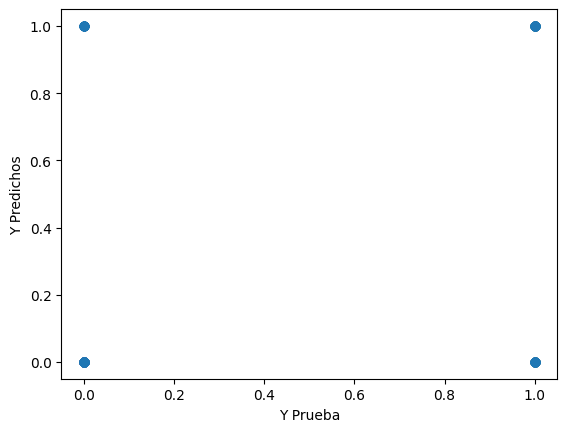

In [4269]:
# visualicemos la intersección -> intercept -> w0 = valor de y cuando x es nulo

print(classification_report(y_test,predictions))
plt.scatter(y_test,predictions)
plt.xlabel('Y Prueba')
plt.ylabel('Y Predichos')

## Testeando otro modelo predictivo

In [4270]:
# Elimina las columnas innecesarias para el análisis
from sklearn.calibration import LabelEncoder
from sklearn import preprocessing



train2 = df.copy()
train2 = train2.drop(['Con_hijos', 'Con_vehiculo'], axis=1)

# Elimina las filas con valores faltantes
train2 = train2.dropna()

escalador = preprocessing.MinMaxScaler(feature_range=(0, 1))
datos_normalizados = escalador.fit_transform([[valor] for valor in train2['Income']])

# Codifica las variables categóricas a numéricas
label_encoder = LabelEncoder()
train2['Marital Status'] = label_encoder.fit_transform(train2['Marital Status'])
train2['Gender'] = label_encoder.fit_transform(train2['Gender'])
train2['Education'] = label_encoder.fit_transform(train2['Education'])
train2['Occupation'] = label_encoder.fit_transform(train2['Occupation'])
train2['Home Owner'] = label_encoder.fit_transform(train2['Home Owner'])
train2['Commute Distance'] = label_encoder.fit_transform(train2['Commute Distance'])
train2['Region'] = label_encoder.fit_transform(train2['Region'])
train2['Purchased Bike'] = label_encoder.fit_transform(train2['Purchased Bike'])
train2['Income'] = datos_normalizados
train2

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0,0,0.1875,1.0,0,4,1,0.0,0,0,42.0,0
1,24107,0,1,0.1250,3.0,3,0,1,1.0,0,0,43.0,0
2,14177,0,1,0.4375,5.0,3,3,0,2.0,3,0,60.0,0
4,25597,1,1,0.1250,0.0,0,0,0,0.0,0,0,36.0,1
5,13507,0,0,0.0000,2.0,3,2,1,0.0,1,0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,0,1,0.4375,5.0,3,3,1,3.0,1,1,46.0,0
995,23731,0,1,0.3125,2.0,2,3,1,2.0,3,1,54.0,1
996,28672,1,1,0.3750,4.0,1,3,1,0.0,3,1,35.0,1
998,19664,1,1,0.5625,3.0,0,1,0,3.0,1,1,38.0,0


In [4271]:
X = train2.drop('Purchased Bike', axis=1)
y = train2['Purchased Bike']

In [4272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4273]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=150, random_state=42) # AC = 0.74
# model = LogisticRegression() # AC = 0.54
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [4274]:
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72        98
           1       0.73      0.71      0.72       100

    accuracy                           0.72       198
   macro avg       0.72      0.72      0.72       198
weighted avg       0.72      0.72      0.72       198



Text(0, 0.5, 'Y Predichos')

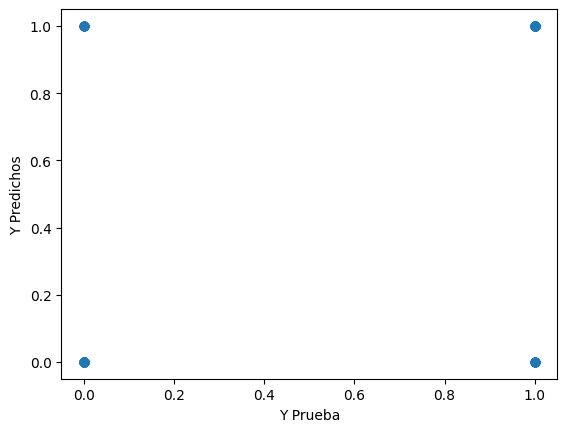

In [4275]:
print(classification_report(y_test, y_pred))
plt.scatter(y_test,y_pred)
plt.xlabel('Y Prueba')
plt.ylabel('Y Predichos')

1. Exactitud (accuracy): Es la proporción de predicciones correctas sobre el total de predicciones. Un valor cercano a 1 indica un modelo preciso.

2. Precisión (precision): Es la proporción de casos positivos correctamente identificados sobre el total de casos positivos predichos. Representa la capacidad del modelo para evitar falsos positivos.

3. Recall (también conocido como sensibilidad o verdadero positivo rate): Es la proporción de casos positivos correctamente identificados sobre el total de casos positivos reales. Representa la capacidad del modelo para evitar falsos negativos.

4. F1-score: Es una medida de la precisión y el recall que proporciona un balance entre ambos. Es útil cuando las clases están desbalanceadas.

In [4276]:
df_pred = pd.DataFrame(X_test)
df_pred = df_pred.assign(Compro = y_test)
df_pred = df_pred.assign(Pred = y_pred.flatten().tolist())
df_pred.head(10)


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Compro,Pred
215,27951,1,1,0.437500,4.0,3,3,0,2.0,3,0,54.0,1,0
333,18160,0,1,0.750000,3.0,2,3,1,4.0,4,0,51.0,1,1
504,25405,0,1,0.375000,2.0,0,4,1,1.0,3,1,38.0,1,1
311,21207,0,1,0.312500,1.0,3,4,1,1.0,4,2,46.0,0,1
89,25458,0,1,0.062500,1.0,2,2,0,1.0,1,0,40.0,1,1
538,11262,0,0,0.437500,4.0,0,1,1,0.0,0,1,42.0,0,0
282,14696,1,1,0.000000,0.0,4,2,0,2.0,0,0,34.0,0,0
108,26829,0,0,0.187500,0.0,0,0,1,0.0,0,0,38.0,1,1
60,24185,1,0,0.000000,1.0,2,2,0,1.0,1,0,45.0,0,1
509,24357,0,1,0.374298,3.0,0,3,1,1.0,3,1,48.0,1,1


In [4277]:
# Paso 5: Scoring de venta
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva (compra)
scoring = y_pred_proba * 100  # Escala el valor a una puntuación de 0 a 100
results = pd.DataFrame({'ID': X_test.ID, 'Scoring': scoring})
results = results.sort_values(by='Scoring', ascending=False)
print("Scoring de venta:")
print(results)

Scoring de venta:
        ID    Scoring
365  22636  99.333333
108  26829  98.666667
945  25419  97.333333
353  26354  96.666667
323  27760  95.333333
..     ...        ...
625  22127   7.333333
551  27393   7.333333
698  27040   6.666667
268  19626   6.000000
915  21752   1.333333

[198 rows x 2 columns]


In [4278]:
# df_pred = pd.DataFrame(X_test)
# df_pred = df_pred.assign(Scoring = results['Scoring'])
# df_pred = df_pred.assign(Pred = y_pred.flatten().tolist())
# scoring[scoring == np.nan]
df_pred['Scoring'] = scoring
# df_pred[df_pred['ID'] == 22636]
df_pred[np.logical_and(df_pred['Compro'] == 1 , df_pred['Pred'] == 1)]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Compro,Pred,Scoring
333,18160,0,1,0.750000,3.0,2,3,1,4.0,4,0,51.000000,1,1,62.000000
504,25405,0,1,0.375000,2.0,0,4,1,1.0,3,1,38.000000,1,1,87.333333
89,25458,0,1,0.062500,1.0,2,2,0,1.0,1,0,40.000000,1,1,54.000000
108,26829,0,0,0.187500,0.0,0,0,1,0.0,0,0,38.000000,1,1,98.666667
509,24357,0,1,0.374298,3.0,0,3,1,1.0,3,1,48.000000,1,1,66.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,18580,0,0,0.312500,2.0,1,3,1,0.0,3,1,52.440367,1,1,70.666667
906,25394,0,1,0.312500,1.0,1,3,1,0.0,3,1,34.000000,1,1,93.333333
79,27745,1,1,0.187500,2.0,0,1,1,2.0,4,2,63.000000,1,1,88.666667
66,29355,0,0,0.187500,0.0,1,0,1,0.0,0,0,37.000000,1,1,87.333333


0.805969387755102

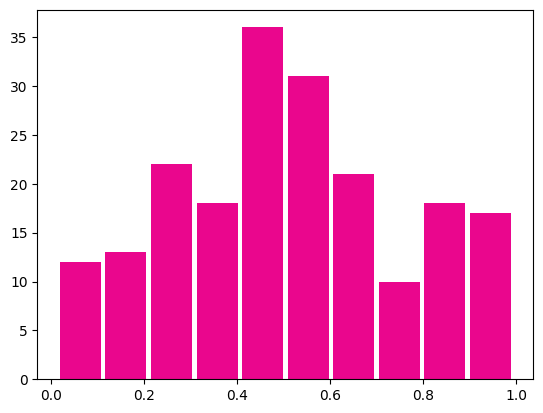

In [4279]:
## AUC: Area bajo la curva
from sklearn import metrics

# Calculando probabilidades del modelo
prob_test_rl = model.predict_proba(X_test)[:,1]
plt.hist(prob_test_rl, color = '#ea068d', rwidth=0.9)
plt.savefig('Probabilidades_logreg.png', bbox_inches='tight')

auc_rl = metrics.roc_auc_score(y_test, prob_test_rl)
auc_rl

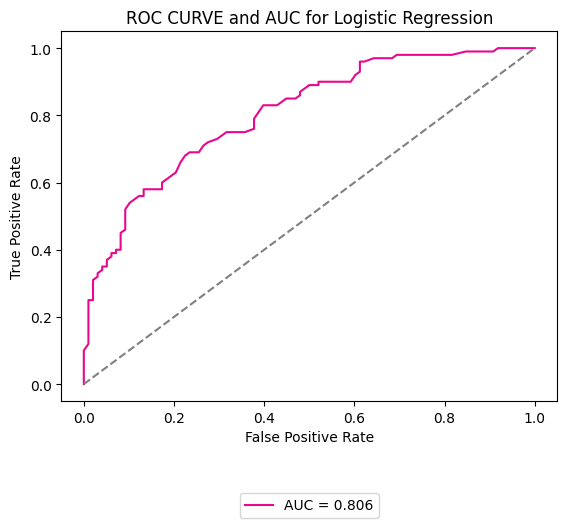

In [4280]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_test_rl)
plt.plot(fpr, tpr, label= "AUC = " + str(auc_rl.round(3)), color='#ea068d')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC CURVE and AUC for Logistic Regression')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(.5,-0.23), loc='upper center')
plt.savefig('ROC_CURVES_logreg.png', bbox_inches='tight')